# Matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 常见设置
- plt.title()
- plt.ylabel()
- plt.xlabel()
- plt.grid()  显示网格
- plt.xlim(min, max) 设置x轴的显示范围
- plt.ylim(min, max) 设置y轴的显示范围
- plt.xticks(list) 设置横轴的显示记号
- plt.yticks(list) 设置纵轴的显示记号

# 简单线形图
### plt.plot()
- plot(y)    只给定y值，默认以下标为x轴
- plot(x, y) 第一x为横轴，第二个y为数轴
- plot(x, y, format_string) 使用指定的字符绘画曲线
- plot(x1, y1, str1, x2, y2, str2) 在同一个图中绘制两条线

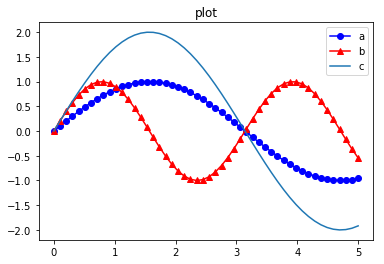

In [9]:
x = np.linspace(0, 5, 50)
plt.title('plot')
plt.plot(x, np.sin(x), 'b-o', label='a')
plt.plot(x, np.sin(x*2), 'r-^', label='b')
plt.plot(x, 2*np.sin(x),label='c')
plt.legend(['a', 'b','c']) # 显示曲线的label
plt.tick_params(axis='both', labelsize=10) # 设置刻度的字体大小

# scatter 散点图
输入一个x list和y list，在指定位置绘制一个点（可以同时绘制多个点）
- scatter(x,y)
- scatter(x, y, size)
- scatter(x, y, size, color)

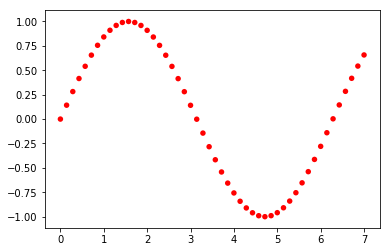

In [20]:
# 绘制一个简单的散点曲线
x = np.linspace(0, 7, 50)
plt.scatter(x, np.sin(x),c='red', edgecolor='none', s=30) # 分别指定了颜色，散点轮廓颜色，大小

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


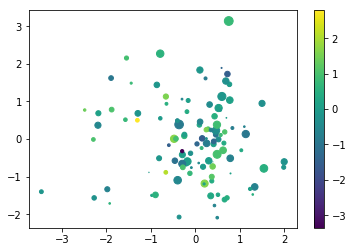

In [11]:
# 绘制二维散点图，并显示colorbar。
x = np.random.randn(200)
y = np.random.randn(200)
size = np.random.randn(200) * 30
color = np.random.randn(200)
plt.scatter(x, y, size, color)
plt.colorbar()

# 绘制多个独立图像
### 使用plt.figure()产生多个图像

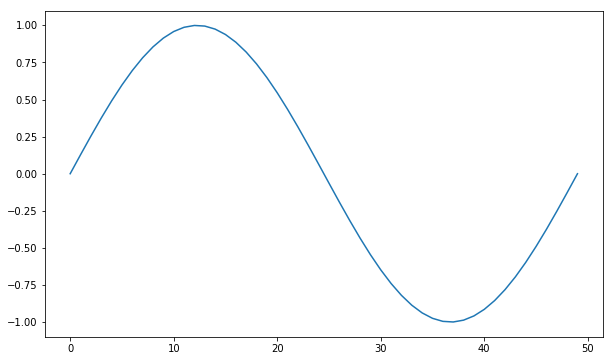

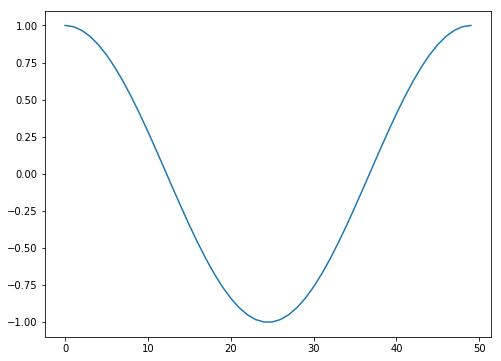

In [13]:
t = np.linspace(0, 2*np.pi, 50)
plt.figure(figsize=(10, 6)) # 可以通过figsize指定图片大小
plt.plot(np.sin(t))
plt.figure(figsize=(8,6))
plt.plot(np.cos(t))

### 使用plt.subplot(numRows, numCols, plotNum)每次设定一个子图
- 将一个figure分割成numRows*numCols个方格，并返回第plotNum个子图进行绘制
- 通过重新设定方格分割方式可以绘制不同大小的图像
    1. 首先将整个表按照 2*2 划分。前两个简单, 分别是 (2, 2, 1) 和 (2, 2, 2)。第三个图, 他占用了 (2, 2, 3) 和 (2, 2, 4)。需要对其重新划分, 按照 2 * 1 划分。前两个图占用了 (2, 1, 1) 的位置，因此第三个图占用了 (2, 1, 2) 的位置。


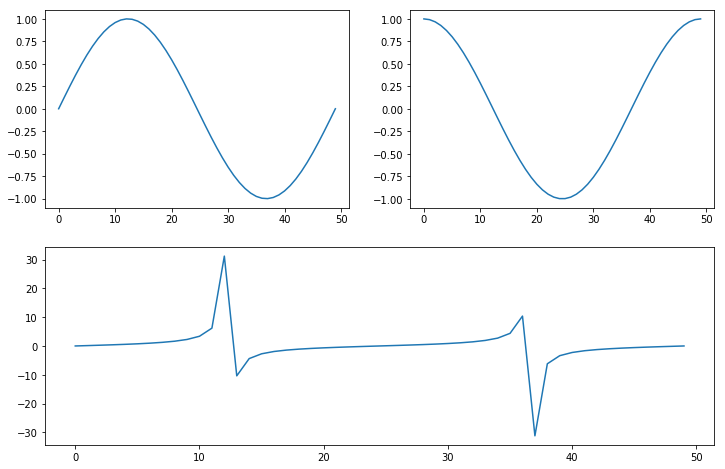

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.plot(np.sin(t))
plt.subplot(2, 2, 2)
plt.plot(np.cos(t))
plt.subplot(2, 1, 2)
plt.plot(np.tan(t))

# plt.bar()绘制条形图
- plt.bar(range(),list,alpha, color, align) 创建垂直柱状图
    - 参数alpha表示透明度
    - 参数align表示对齐
- plt.xticks()设置x轴刻度标签值
- plt.ylim()设置y轴范围
- plt.text()添加条形图的数值标签

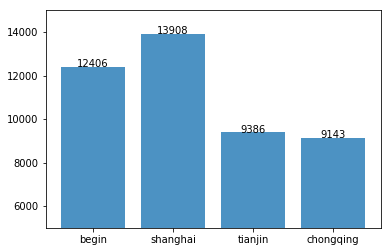

In [22]:
GDP = [12406,13908,9386,9143]
plt.bar([0,1,2,3],GDP,alpha = 0.8)

city_name = ['begin','shanghai','tianjin','chongqing']
plt.xticks(range(4),city_name)
plt.ylim([5000,15000])

for x,y in enumerate(GDP):
    plt.text(x,y,'%s'%round(y,1),ha='center')

## 水平交错条形图
针对多个离散变量的比较，可使用水平交错条形图和堆叠条形图

水平交错条形图绘制的思想很简单，就是在第一个条形图绘制好的基础上，往左移一定的距离，再去绘制第二个条形图，所以在代码中会出现两个bar函数；
- 图例的绘制需要在bar函数中添加label参数
- plt.legend() 在右上角显示每个bar所代表的值

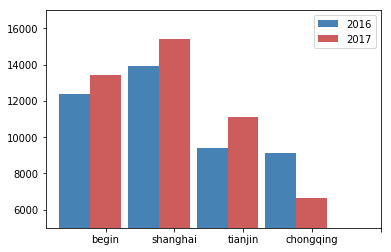

In [81]:
GDP2016 = [12406,13908,9386,9143]
GDP2017 = [13412,15423,11121,6634]
city_name = ['begin','shanghai','tianjin','chongqing']
bar_width = 0.45

plt.bar(np.arange(4),GDP2016,label='2016',color='steelblue',width = bar_width)
plt.bar(np.arange(4)+bar_width,GDP2017,label='2017',color='indianred',width=bar_width)

plt.xticks(np.arange(5)+bar_width,city_name)
plt.ylim([5000,17000])

plt.legend()

## 垂直堆叠条形图
垂直堆叠条形图的绘制思想与水平交错条形图一样，只不过一个是向上偏移，一个是往左偏移。
- 垂直条形图的绘制不仅仅需要提供x,y轴的数值，还需要提供bottom参数，其目的就是在某个条形图顶端的基础上，绘制其他条形图，以此类推可以绘制多个堆叠条形图；
- 先计算两个list 的差值，然后在一个bar基础上使用bottom参数构建另一个bar

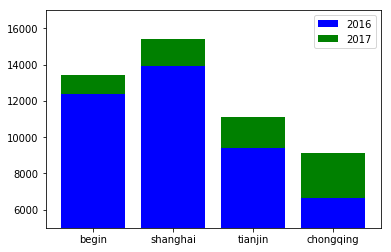

In [23]:
GDP2016 = [12406,13908,9386,9143]
GDP2017 = [13412,15423,11121,6634]
GDPminus = [j-i for i,j in zip(GDP2016,GDP2017) ]
city_name = ['begin','shanghai','tianjin','chongqing']
bar_width = 0.45

plt.bar(np.arange(4),GDP2016,label='2016',color='blue')
plt.bar(np.arange(4),GDPminus,bottom= GDP2016,label='2017',color='green')
plt.xticks(np.arange(4),city_name)
plt.ylim([5000,17000])
plt.legend()

# plt.pie()绘制饼状图
plt.pie(x, explode=None, labels=None, colors=None, autopct=None)
- x：指定绘图的数据；
- explode：指定饼图某些部分的突出显示，即呈现爆炸式；
- labels：为饼图添加标签说明，类似于图例说明；
- colors：指定饼图的填充色；
- autopct：自动添加百分比显示，可以采用格式化的方法显示；

([<matplotlib.patches.Wedge at 0x119d28710>,
 [Text(1.04616,0.339919,'middle_school'),
  Text(0.339919,1.04616,'high_school'),
  Text(-1.14127,0.37082,'bachelor'),
  Text(1.54484e-07,-1.1,'master'),
  Text(1.04616,-0.339919,'doctor')])

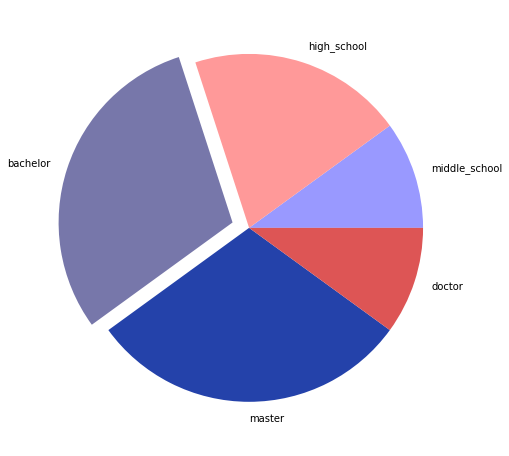

In [26]:
edu = [0.1,0.2,0.3,0.3,0.1]
labels = ['middle_school','high_school','bachelor','master','doctor']
explode = [0,0,0.1,0,0]# 用于突出显示bachelor学历人群
colors=['#9999ff','#ff9999','#7777aa','#2442aa','#dd5555'] # 自定义颜色
plt.figure(figsize=(8,8))
plt.axes(aspect='equal')# 将横、纵坐标轴标准化处理，保证饼图是一个正圆，否则为椭圆
plt.pie(x = edu,explode=explode,labels=labels,colors=colors)

# 图片显示

In [28]:
import numpy as np
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

img = imread('1.jpg')
img_tinted = img * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


FileNotFoundError: [Errno 2] No such file or directory: '1.jpg'

# 3D图
使用mpl_toolkits.mplot3d 绘制3d图

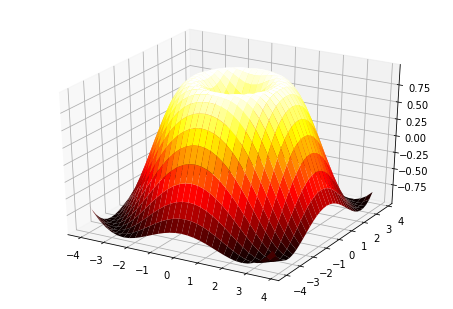

In [29]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')